# 합성곱 신경망을 사용한 이미지 분류

In [10]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input,train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()
train_scaled=train_input.reshape(-1,28,28,1)/255.0
train_scaled,val_scaled,train_target,val_target=train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

In [11]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))

g:\github\self_MachineLearning-DeepLearning\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.add(keras.layers.MaxPooling2D(2))

In [13]:
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [14]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
keras.utils.plot_model(model)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [17]:
keras.utils.plot_model(model,show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-cnn-model.keras',save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history=model.fit(
    train_scaled,
    train_target,
    epochs=20,
    validation_data=(val_scaled,val_target),
    callbacks=[checkpoint_cb,early_stopping_cb]
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8028 - loss: 0.5414 - val_accuracy: 0.8779 - val_loss: 0.3386
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8676 - loss: 0.3656 - val_accuracy: 0.8913 - val_loss: 0.2945
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8863 - loss: 0.3137 - val_accuracy: 0.8997 - val_loss: 0.2687
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8968 - loss: 0.2811 - val_accuracy: 0.9089 - val_loss: 0.2450
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9073 - loss: 0.2539 - val_accuracy: 0.9133 - val_loss: 0.2349
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9136 - loss: 0.2321 - val_accuracy: 0.9143 - val_loss: 0.2471
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9199 - loss: 0.2149 - val_accuracy: 0.9193 - val_loss: 0.2228
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9239 - loss: 0

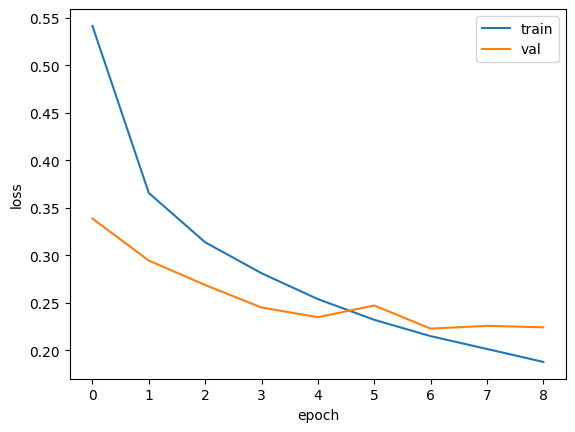

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [20]:
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9193 - loss: 0.2228


[0.22280876338481903, 0.9192500114440918]

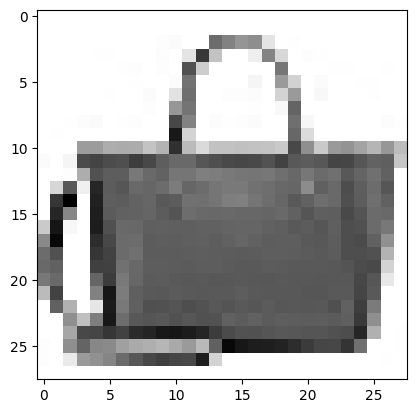

In [21]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

In [22]:
preds=model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
[[3.3120097e-16 1.9748486e-24 6.4951866e-19 3.9805751e-18 4.3745803e-16
  5.5789544e-16 3.1304066e-15 2.2013129e-17 1.0000000e+00 2.3214703e-16]]


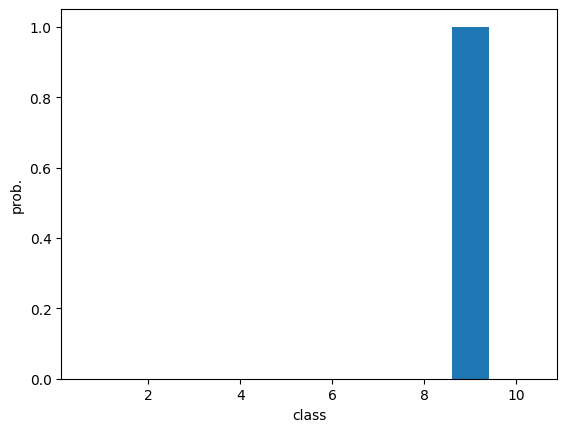

In [23]:
plt.bar(range(1,11),preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [24]:
classes=[
    '티쳐츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠'
]

In [25]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [26]:
test_scaled=test_input.reshape(-1,28,28,1)/255.0

In [28]:
model.evaluate(test_scaled,test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9131 - loss: 0.2406


[0.2405971884727478, 0.913100004196167]